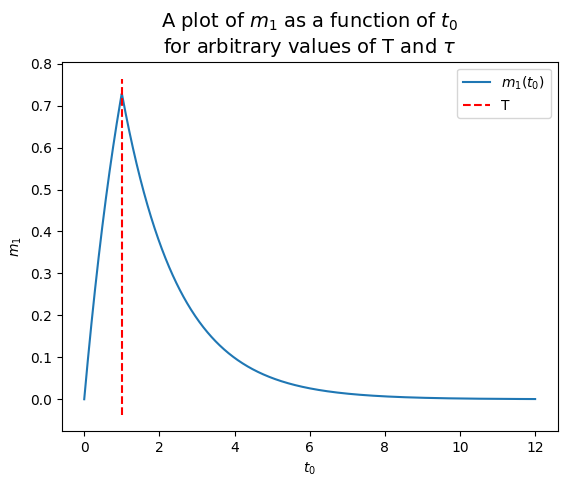

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# parameters configuration
N = 1000
T = 1
tau = 1.5
t0 = np.linspace(0, 4*3, 1000)
m1 = np.zeros(N)


# define expressions
inds = np.where(t0 <= T)
m1[inds] = tau*(1-np.exp(-t0[inds]/tau))

inds = np.where(t0 > T)
m1[inds] = tau*np.exp(-t0[inds]/tau)*(np.exp(T/tau)-1)

# plot
plt.plot(t0, m1, label='$m_1(t_0)$')
ymin, ymax = plt.ylim()
plt.vlines([T], ymin, ymax, linestyle='--', color='r', label='T')
plt.legend()
plt.xlabel('$t_0$')
plt.ylabel('$m_1$')
plt.title("A plot of $m_1$ as a function of $t_0$\nfor arbitrary values of T and $\\tau$", fontdict={'fontsize': 14})
plt.show()

0.7958928989289893


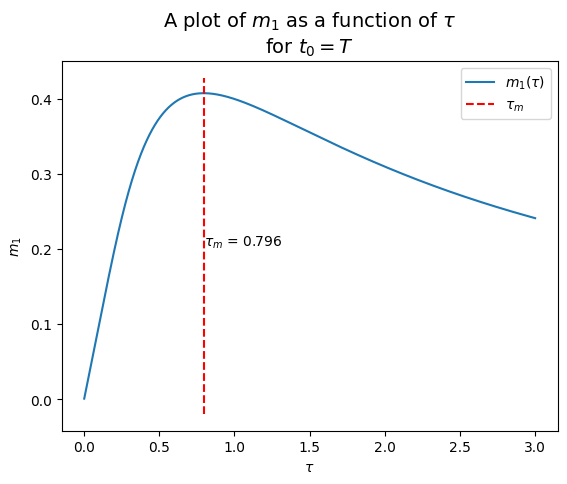

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# parameters configuration
N = 100000
T = 1
tau = np.linspace(0.001, 3, N)

# define expressions
f_tau = tau*(np.exp(-T/tau)-1)**2
tau_m = tau[np.argmax(f_tau, axis=0)]
print(tau_m)

# plot
plt.plot(tau, f_tau, label='$m_1(\\tau)$')
ymin, ymax = plt.ylim()
plt.vlines([tau_m], ymin, ymax, linestyle='--', color='r', label='$\\tau_m$')
plt.text(tau_m, 0.5*(ymin+ymax), '$\\tau_m$ = {:.3f}'.format(tau_m))
plt.legend()
plt.xlabel('$\\tau$')
plt.ylabel('$m_1$')
plt.title("A plot of $m_1$ as a function of $\\tau$\nfor $t_0=T$", fontdict={'fontsize': 14})
plt.show()

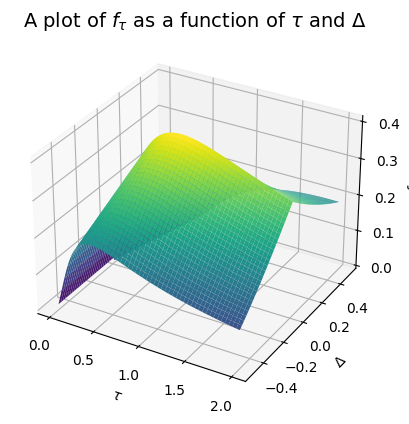

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# parameters configuration
N = 1000
T = 1

Delta = np.linspace(-0.5, 0.5, N)
tau = np.linspace(0.01, 2, N)

tau, Delta = np.meshgrid(tau, Delta)
m1 = np.zeros((N, N))

# delta < 0
inds = np.where(Delta <= 0)
m1[inds] = tau[inds]*(1-np.exp(-(T+Delta[inds])/tau[inds]))**2

# delta > 0
inds = np.where(Delta > 0)
m1[inds] = tau[inds]*(np.exp(-(T+Delta[inds])/tau[inds])*(np.exp(T/tau[inds])-1))**2

# find the argmax of f_tau
tau_m = tau[np.argmax(m1, axis=1), 0]
Delta_m = Delta[np.argmax(m1, axis=1), 0]

# plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(tau, Delta, m1, cmap='viridis')
ax.set_xlabel('$\\tau$')
ax.set_ylabel('$\\Delta$')
ax.set_zlabel('$f_\\tau$')
ax.set_title("A plot of $f_\\tau$ as a function of $\\tau$ and $\\Delta$", fontdict={'fontsize': 14})

plt.show()

AttributeError: 'float' object has no attribute 'mean'

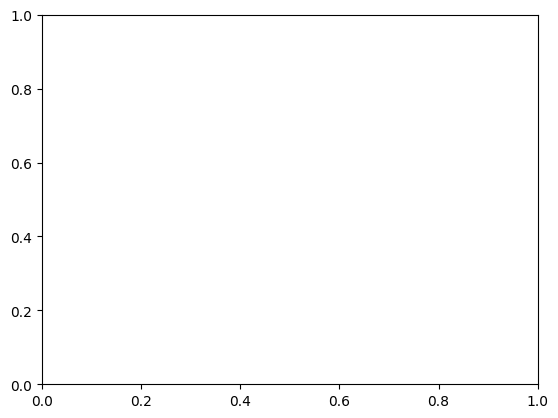

In [107]:
# plot m1 as a function of tau for Delta = -0.2, -0.1, 0, 0.1, 0.2
fig, ax = plt.subplots(1,1)


for Delta_m in [-0.2, -0.1, 0, 0.1, 0.2]:
    inds = np.where(np.abs(Delta == Delta_m)<1e-3).mean()
    ax.plot(tau[inds], m1[inds], label='$\\Delta$ = {:.1f}'.format(Delta_m))

ax.set_xlabel('$\\tau$')
ax.set_ylabel('$m_1$')
ax.set_title("A plot of $m_1$ as a function of $\\tau$\nfor $t_0=T$", fontdict={'fontsize': 14})
ax.legend()
plt.show()

Text(0.5, 1.0, 'A plot of $f_\\tau$ as a function of $\\tau$ and $\\Delta$')

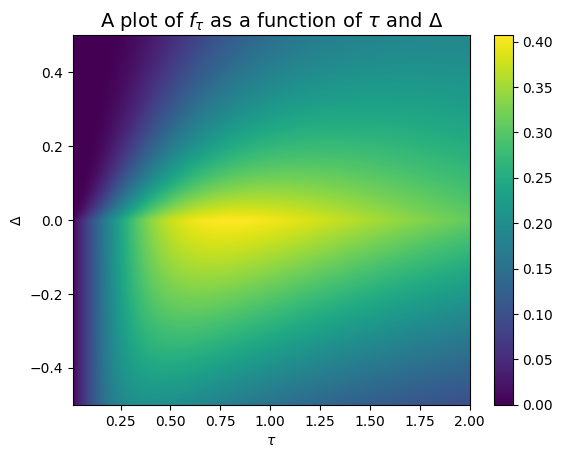

In [103]:
plt.imshow(m1, cmap='viridis', extent=[tau.min(), tau.max(), Delta.min(), Delta.max()], aspect='auto', origin='lower')
plt.colorbar()
plt.xlabel('$\\tau$')
plt.ylabel('$\\Delta$')
plt.title("A plot of $f_\\tau$ as a function of $\\tau$ and $\\Delta$", fontdict={'fontsize': 14})

# add a line for tau_m